# Homework 3

Unzip the zip file that contains the homework and the data associated with it, then run the code below:

In [1070]:
import os
import sys
import hashlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

assert os.path.exists('../homeworks/HW3.ipynb')
assert os.path.exists('../data/hw3-task2-data.csv')
assert os.path.exists('../data/BreastTissue.xlsx')


## Task 1

Run the code below before you start working on your homework:


In [1071]:
info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/'+name,'w') as f:
    f.write(info)

In [1072]:
with open('../other/'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/'+name)

## Task 2

Using [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function read the data file '`data/hw3-task2-data.csv`' below:

In [1073]:
# print(os.getcwd()) 
task2_data = pd.read_csv("../data/hw3-task2-data.csv")
task2_data.head(10)

,x,y,c
1,-2.873979,-1.977563,0
2,-1.939798,-2.758217,0
3,-1.954560,2.657385,0
4,-3.284104,1.952121,0
5,-1.954758,2.351581,0
6,-1.133108,2.649699,0
7,-0.063933,-2.703307,0
8,2.272370,-1.921207,0
9,2.627003,-2.284012,0
10,1.695585,-3.618690,0


Now, using the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `sklearn`, create training and testing data subsets. Use 25% of your data as test, and remaining as your training data sets.

In [1074]:
# iloc[:,0:2] 0 (x) ve 1. (y) coloumns and all rows
# iloc[:,2] second columns (c) and all rows 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(task2_data.iloc[:,0:2], task2_data.iloc[:,2], test_size=0.25)

Now, using [`sklearn.cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) create a k-means model below for 2 clusters, train it and use the test dataset to make predictions:

In [1075]:
model = KMeans(n_clusters=2, random_state=0)
# model should be fit with train data
model.fit(Xtrain)
# predict with test data
predictions =  model.predict(Xtest)

Now, using [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) construct the confusion matrix, and calculate your accuracy using sklearn's [cross-validation tools](http://scikit-learn.org/stable/modules/model_evaluation.html).  Try to repeat your experiments until you reach a reasonable accuracy result.

In [1076]:
from sklearn.metrics import accuracy_score
cm = confusion_matrix(Ytest, predictions)
print(cm)
accuracy = accuracy_score(Ytest, predictions)
print(accuracy)

[[62 65]
 [65 46]]
0.453781512605042


As you observed, your accuracy is really terrible.  Inspect the data, make a plot and observe that k-means **will never** produce a usable estimate of clusters for this dataset:

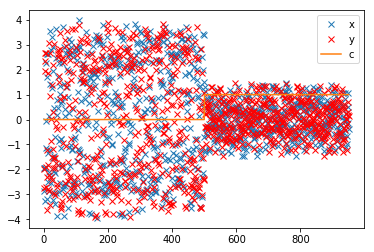

In [1077]:
## Do your inspections and plots in this cell
import matplotlib.pyplot as plot
task2_data.plot(style=['x','xr'])
plot.show()

In this cell, write an explanation as to why the k-means algorithm will never work:

### Your explanation goes below

K-mean algoritmasi datasetlerini kumelestirme (cluster) amaci guder. Datamizi train ederken "model.fit(Xtrain)" dedik ve sadece x degerlerimizi verdik, yani algoritma bizim y degerlerimizi bilmiyor, sadece verdigimiz x degerlerini kumelestiriyor. Dolayisiyla K-mean algoritmasindan y'ye yonelik sonuc beklemek mantikli degil. "Unsupervised" tekniktir.

## Task 3

Now, instead of using k-means model, let us use a k-nn model.  Below, using [`sklearn.neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) create a model, train it and use the test dataset to make predictions.  Use the same train-test datasets we created earlier.  You are free to choose the parameters 'k' and the 'metric':

In [1078]:
# n_neighbors odd is better
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(Xtrain, Ytrain)
predictions =  model.predict(Xtest)
print(predictions)

[1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0
 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0
 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0]


Now, construct the confusion matrix, and calculate your accuracy.

In [1079]:
cm = confusion_matrix(Ytest,predictions)
print(cm)
accuracy = accuracy_score(Ytest,predictions)
print(accuracy)

[[127   0]
 [  0 111]]
1.0


Accuracy is much better. Explain below why, in theory, this method does produce better results in this case:

### Your explanation goes below

KNN algoritmasi yapisi geregi veriyi "siniflandirmak" icin kullanilir ve train ederken y (sinif) degerlerini de kullaniyoruz. "Supervised" tekniktir.

## Task 4

Using [`pandas.read_excel`]() read the [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx'

In [1080]:
data = pd.read_excel('../data/BreastTissue.xlsx')
data.head(10)
xs = data.iloc[:,1:]
ys = data.iloc[:,0]

Now, create a k-nn model, train and test it. Your dependent variable is `Class` column. You are free to choose `k` and the `metric`:

In [1081]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25)

In [1082]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(Xtrain,Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest,predicted)
accuracy = accuracy_score(Ytest,predicted)
print(cm)
print(accuracy)

[[4 0 2 0 0 0]
 [0 2 0 0 0 1]
 [0 2 0 0 0 0]
 [0 0 0 1 2 3]
 [0 0 0 4 2 1]
 [0 0 0 0 0 3]]
0.4444444444444444


Now, using [feature scaling](http://scikit-learn.org/stable/modules/preprocessing.html), specifically, using [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) normalize the feature columns `xs` we defined earlier below:

In [1083]:
scaler = StandardScaler()
scaler.fit(xs)
xs = scaler.transform(xs)

Now, repeat mdoel construction, training, testing and accuracy calculation

In [1084]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs,ys,test_size=0.25)
model = KNeighborsClassifier(n_neighbors=6)
model.fit(Xtrain,Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest,predicted)
accuracy = accuracy_score(Ytest,predicted)
print(cm)
print(accuracy)

[[6 0 0 0 0 0]
 [0 4 0 0 0 2]
 [1 0 0 1 0 1]
 [0 0 0 2 0 2]
 [0 0 0 1 4 1]
 [0 0 0 0 0 2]]
0.6666666666666666


Why did we get better results? Explain below:

### Your explanation goes below

StandardScaler datayi ortalama ve standart sapmasina gore degistirecek, dolayisiyla data daha ideal bir input haline gelecek ve "accuracy" degerimiz daha iyi bir deger olacak.

## Task 5

Now, construct a k-means model for the same dataset  [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx' first using the original data, then again, using feature scaling. At the end compare accuracies.

In [1085]:
breastTissueData = pd.read_excel('../data/BreastTissue.xlsx')

Xtrain, Xtest, Ytrain, Ytest = train_test_split(breastTissueData.iloc[:,1:], breastTissueData.iloc[:,0], test_size=0.05)

model = KMeans(n_clusters=6, random_state=0).fit(Xtrain)
# model = KNeighborsClassifier(n_neighbors=6).fit(Xtrain, Ytrain)

predictions = model.predict(Xtest)
# it will be print cluster id's
print(predictions)
accuracy = accuracy_score(Ytest,predictions)
print(accuracy)

[3 4 4 0 0 3]
0.0
